In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('supply_chain_data.csv')

# Display the first few rows of the dataset
print(data.head())


  Product_type  SKU  Price  Availability  Number_of_products_sold  \
0     haircare    1  69.81            55                      802   
1     skincare    2  14.84            95                      736   
2     haircare    3  11.32            34                        8   
3     skincare    4  61.16            68                       83   
4     skincare    5   4.81            26                      871   

   Revenue_generated Customer_demographics  Stock_levels  Lead_times  \
0            8662.00            Non-binary            58           7   
1            7460.90                Female            53          30   
2            9577.75               Unknown             1          10   
3            7766.84            Non-binary            23          13   
4            2686.51            Non-binary             5           3   

   Order_quantities  ...  Location Lead_time  Production_volumes  \
0                96  ...    Mumbai        29                 215   
1               

In [3]:
print(data.isnull().sum())


Product_type               0
SKU                        0
Price                      0
Availability               0
Number_of_products_sold    0
Revenue_generated          0
Customer_demographics      0
Stock_levels               0
Lead_times                 0
Order_quantities           0
Shipping_times             0
Shipping_carriers          0
Shipping_costs             0
Supplier_name              0
Location                   0
Lead_time                  0
Production_volumes         0
Manufacturing_lead_time    0
Manufacturing_costs        0
Inspection_results         0
Defect_rates               0
Transportation_modes       0
Routes                     0
Costs                      0
dtype: int64


In [4]:
data['Price'] = data['Price'].astype(float)
data['Revenue_generated'] = data['Revenue_generated'].astype(float)


In [5]:
print(data.describe())


              SKU       Price  Availability  Number_of_products_sold  \
count  100.000000  100.000000    100.000000               100.000000   
mean    50.500000   49.462500     48.400000               460.990000   
std     29.011492   31.168147     30.743317               303.780074   
min      1.000000    1.700000      1.000000                 8.000000   
25%     25.750000   19.595000     22.750000               184.250000   
50%     50.500000   51.240000     43.500000               392.500000   
75%     75.250000   77.195000     75.000000               704.250000   
max    100.000000   99.170000    100.000000               996.000000   

       Revenue_generated  Stock_levels  Lead_times  Order_quantities  \
count         100.000000    100.000000  100.000000        100.000000   
mean         5776.048600     47.770000   15.960000         49.220000   
std          2732.841169     31.369372    8.785801         26.784429   
min          1061.620000      0.000000    1.000000          1.0

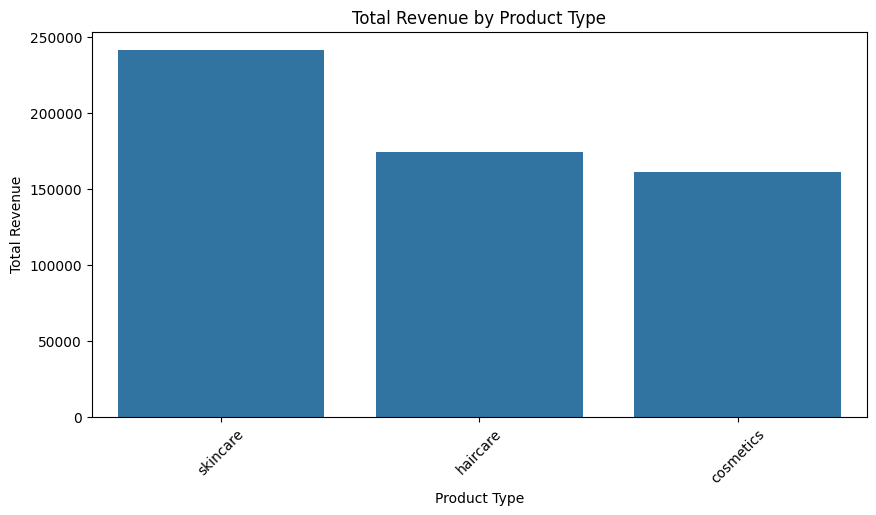

In [6]:
sales_by_type = data.groupby('Product_type')['Revenue_generated'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_type.index, y=sales_by_type.values)
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


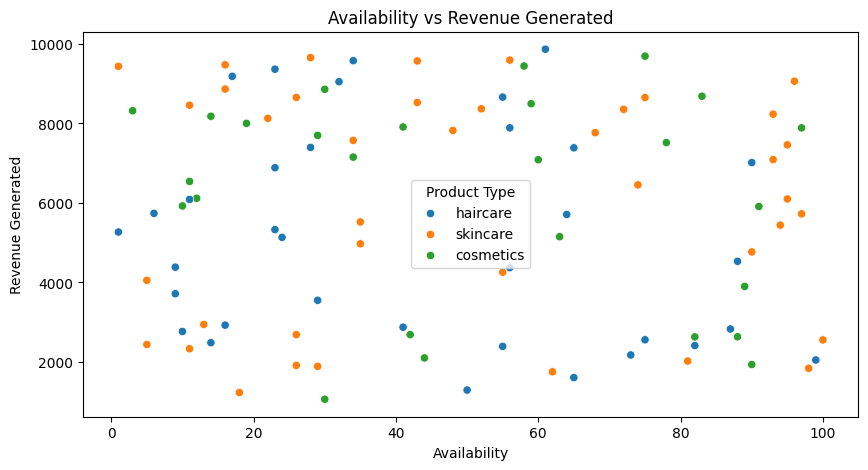

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Availability', y='Revenue_generated', hue='Product_type')
plt.title('Availability vs Revenue Generated')
plt.xlabel('Availability')
plt.ylabel('Revenue Generated')
plt.legend(title='Product Type')
plt.show()


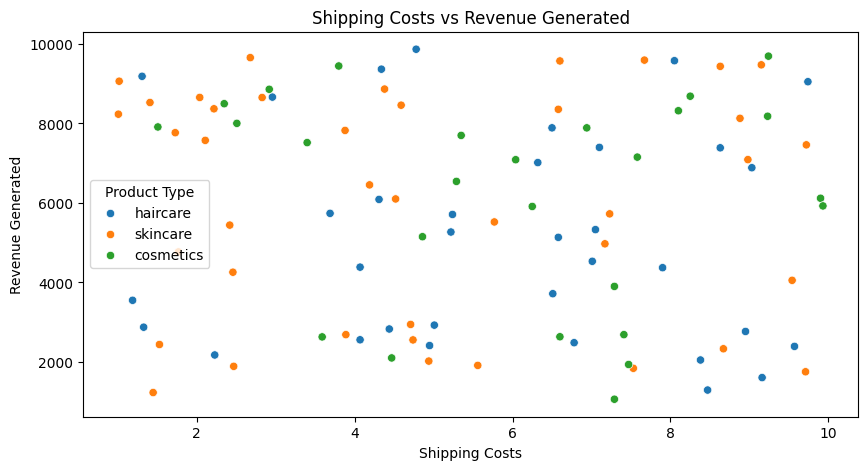

In [8]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Shipping_costs', y='Revenue_generated', hue='Product_type')
plt.title('Shipping Costs vs Revenue Generated')
plt.xlabel('Shipping Costs')
plt.ylabel('Revenue Generated')
plt.legend(title='Product Type')
plt.show()


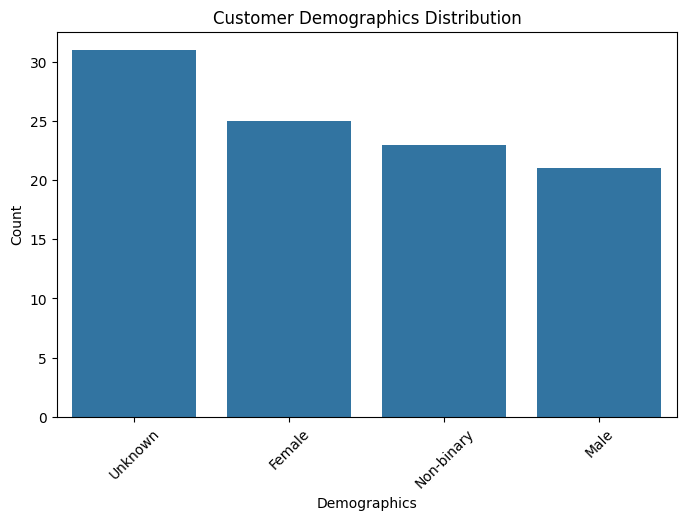

In [9]:
customer_demographics = data['Customer_demographics'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_demographics.index, y=customer_demographics.values)
plt.title('Customer Demographics Distribution')
plt.xlabel('Demographics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [11]:
product_comparison = data.groupby('Product_type').agg({
    'Revenue_generated': 'sum',
    'Number_of_products_sold': 'sum',
    'Availability': 'mean'
}).reset_index()
print(product_comparison)


  Product_type  Revenue_generated  Number_of_products_sold  Availability
0    cosmetics          161521.27                    11757     51.230769
1     haircare          174455.42                    13611     43.264706
2     skincare          241628.17                    20731     50.925000


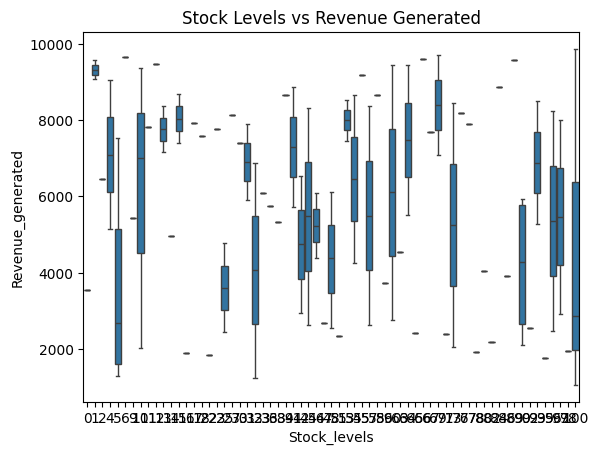

In [4]:
sns.boxplot(data=data, x='Stock_levels', y='Revenue_generated')
plt.title('Stock Levels vs Revenue Generated')
plt.show()


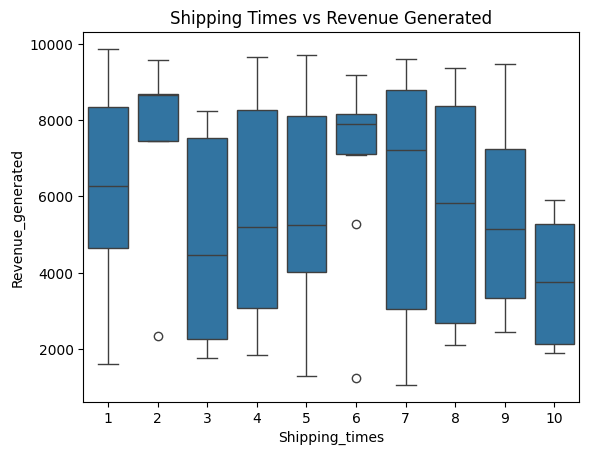

In [5]:
sns.boxplot(data=data, x='Shipping_times', y='Revenue_generated')
plt.title('Shipping Times vs Revenue Generated')
plt.show()


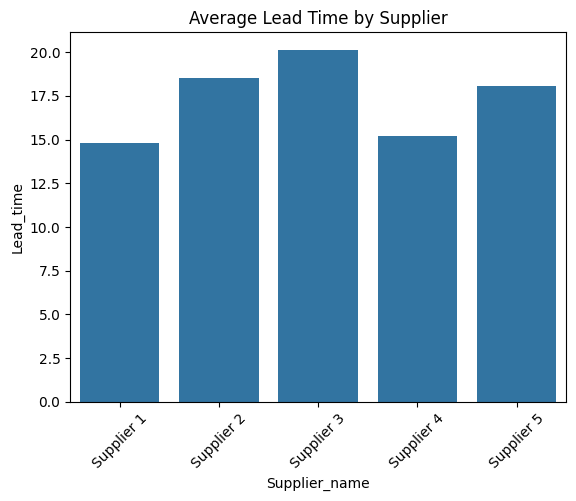

In [6]:
supplier_performance = data.groupby('Supplier_name').agg({
    'Lead_time': 'mean',
    'Defect_rates': 'mean'
}).reset_index()
sns.barplot(x='Supplier_name', y='Lead_time', data=supplier_performance)
plt.title('Average Lead Time by Supplier')
plt.xticks(rotation=45)
plt.show()


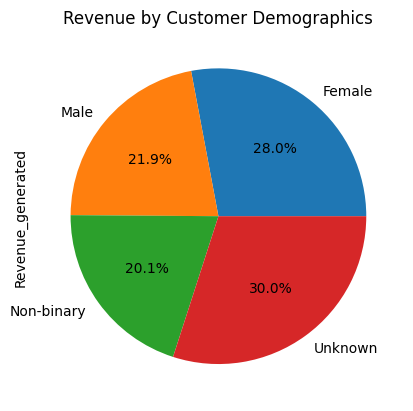

In [7]:
demographics_performance = data.groupby('Customer_demographics')['Revenue_generated'].sum()
demographics_performance.plot(kind='pie', title='Revenue by Customer Demographics', autopct='%1.1f%%')
plt.show()


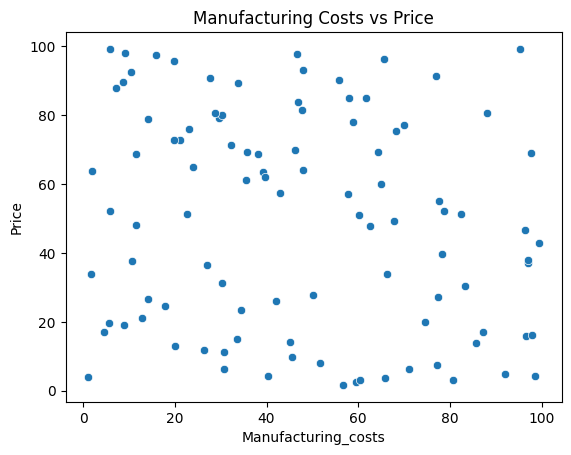

In [8]:
sns.scatterplot(data=data, x='Manufacturing_costs', y='Price')
plt.title('Manufacturing Costs vs Price')
plt.show()


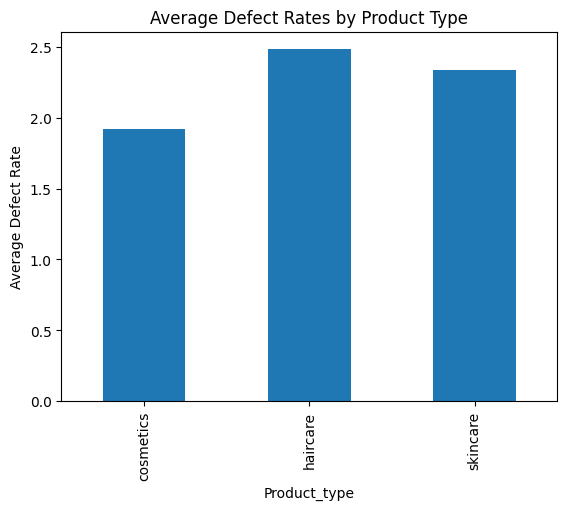

In [9]:
defect_rates = data.groupby('Product_type')['Defect_rates'].mean()
defect_rates.plot(kind='bar', title='Average Defect Rates by Product Type')
plt.ylabel('Average Defect Rate')
plt.show()


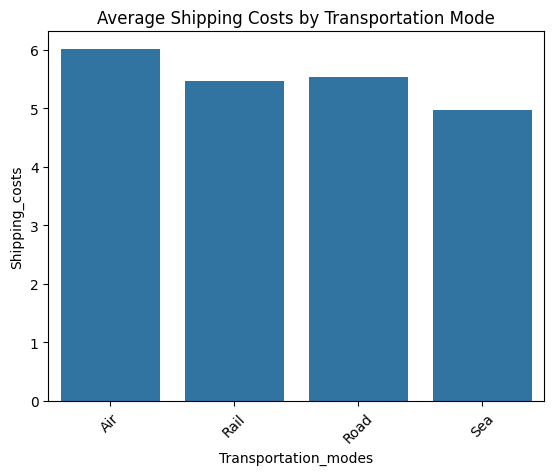

In [10]:
transportation_efficiency = data.groupby('Transportation_modes').agg({
    'Shipping_costs': 'mean',
    'Shipping_times': 'mean'
}).reset_index()
sns.barplot(data=transportation_efficiency, x='Transportation_modes', y='Shipping_costs')
plt.title('Average Shipping Costs by Transportation Mode')
plt.xticks(rotation=45)
plt.show()


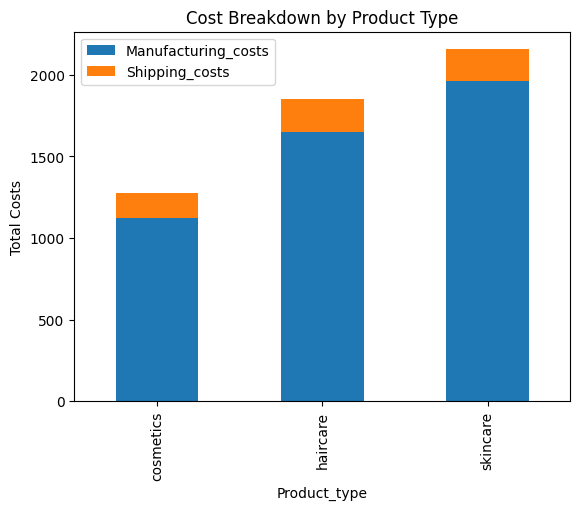

In [11]:
cost_breakdown = data.groupby('Product_type').agg({
    'Manufacturing_costs': 'sum',
    'Shipping_costs': 'sum',
}).reset_index()
cost_breakdown.plot(x='Product_type', kind='bar', stacked=True, title='Cost Breakdown by Product Type')
plt.ylabel('Total Costs')
plt.show()


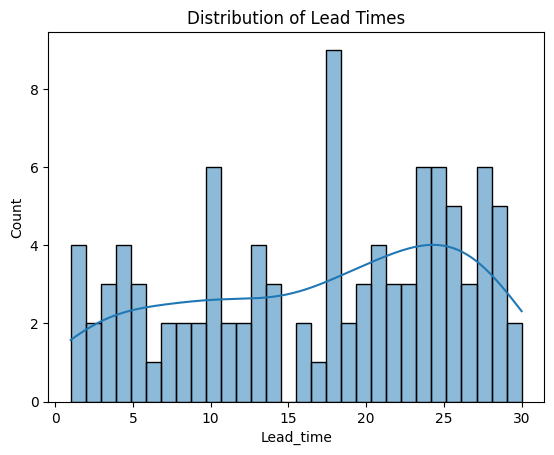

In [12]:
sns.histplot(data['Lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Times')
plt.show()


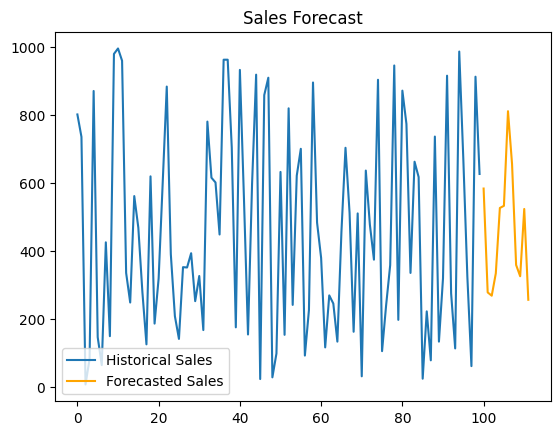

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data['Number_of_products_sold'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
forecast = model_fit.forecast(12)  # Forecast next 12 months
plt.plot(data['Number_of_products_sold'], label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='orange')
plt.title('Sales Forecast')
plt.legend()
plt.show()


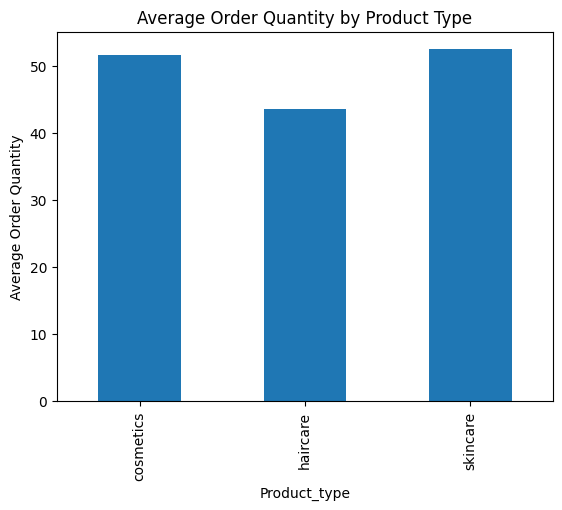

In [15]:
order_quantity_analysis = data.groupby('Product_type')['Order_quantities'].mean()
order_quantity_analysis.plot(kind='bar', title='Average Order Quantity by Product Type')
plt.ylabel('Average Order Quantity')
plt.show()


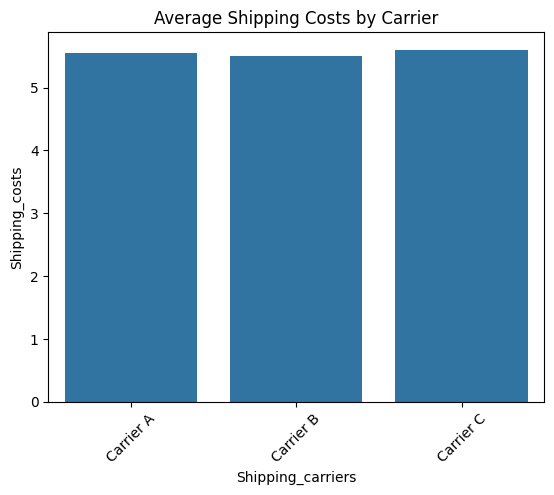

In [16]:
carrier_performance = data.groupby('Shipping_carriers').agg({
    'Shipping_costs': 'mean',
    'Shipping_times': 'mean'
}).reset_index()
sns.barplot(data=carrier_performance, x='Shipping_carriers', y='Shipping_costs')
plt.title('Average Shipping Costs by Carrier')
plt.xticks(rotation=45)
plt.show()


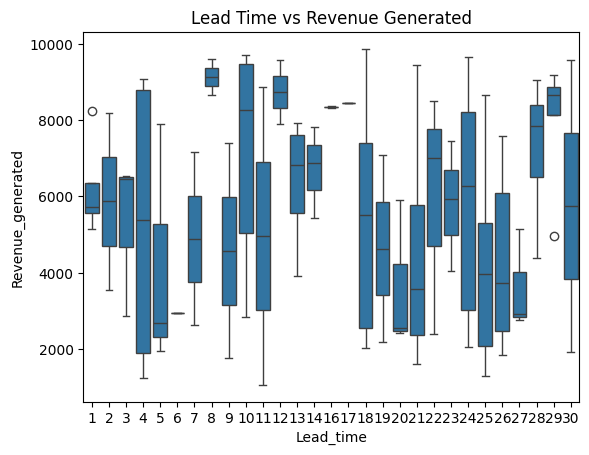

In [17]:
sns.boxplot(data=data, x='Lead_time', y='Revenue_generated')
plt.title('Lead Time vs Revenue Generated')
plt.show()


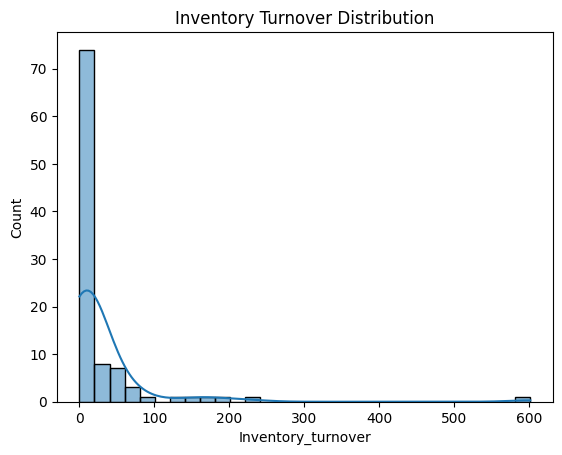

In [18]:
data['Inventory_turnover'] = data['Number_of_products_sold'] / data['Stock_levels']
sns.histplot(data['Inventory_turnover'], bins=30, kde=True)
plt.title('Inventory Turnover Distribution')
plt.show()


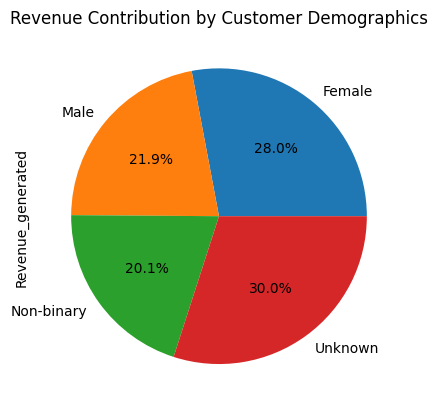

In [20]:
demographic_revenue = data.groupby('Customer_demographics')['Revenue_generated'].sum()
demographic_revenue.plot(kind='pie', title='Revenue Contribution by Customer Demographics', autopct='%1.1f%%')
plt.show()


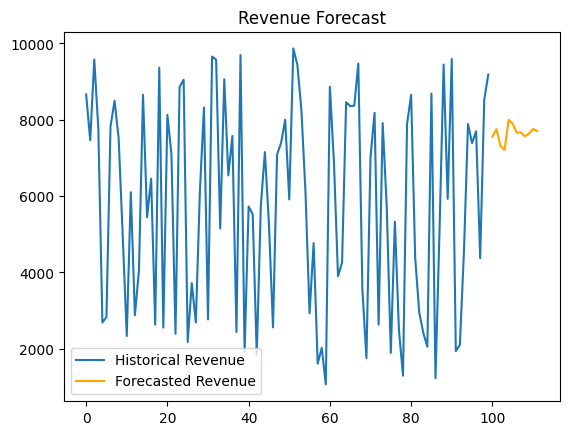

In [21]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Revenue_generated'], order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
plt.plot(data['Revenue_generated'], label='Historical Revenue')
plt.plot(forecast, label='Forecasted Revenue', color='orange')
plt.title('Revenue Forecast')
plt.legend()
plt.show()
